## Load the data

In [3]:
import pandas as pd

df = pd.read_json('data/anime.json')

df.head(1)

,mal_id,url,image_url,trailer_url,title,title_en,title_jp,title_synonyms,type,source,...,mal_popularity,mal_members,mal_favorites,related,producers,licensors,studios,genres,opening_themes,ending_themes
0,1,https://myanimelist.net/anime/1/Cowboy_Bebop,https://cdn.myanimelist.net/images/anime/4/196...,https://www.youtube.com/embed/qig4KOK2R2g?enab...,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,[],TV,Original,...,42,1345609,59329,"{'Adaptation': [{'mal_id': 173, 'type': 'manga...","[{'mal_id': 23, 'type': 'anime', 'name': 'Band...","[{'mal_id': 102, 'type': 'anime', 'name': 'Fun...","[{'mal_id': 14, 'type': 'anime', 'name': 'Sunr...","[{'mal_id': 1, 'type': 'anime', 'name': 'Actio...","[""Tank!"" by The Seatbelts (eps 1-25)]","[#1: ""The Real Folk Blues"" by The Seatbelts fe..."


In [10]:
df.shape # There are 18.986 animes and 34 columns (attributes)

(18986, 34)

In [11]:
# List attributes
df.columns

Index(['mal_id', 'url', 'image_url', 'trailer_url', 'title', 'title_en',
       'title_jp', 'title_synonyms', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_start', 'aired_end', 'premiered', 'broadcast',
       'episode_duration', 'synopsis', 'background', 'mal_rating', 'mal_score',
       'mal_reviewer', 'mal_rank', 'mal_popularity', 'mal_members',
       'mal_favorites', 'related', 'producers', 'licensors', 'studios',
       'genres', 'opening_themes', 'ending_themes'],
      dtype='object')

## List all genres

In [5]:
genres = set()
for _, row in df.iterrows():
    for dic in row['genres']:
        genres.add(dic['name'])

genres = list(genres)

print(sorted(genres))

['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri']


In [6]:
#Convert genres from dictionary to name only, still inside list
df['genres'].apply(lambda x: list(genre['name'] for genre in x))

0        [Action, Adventure, Comedy, Drama, Sci-Fi, Space]
1                  [Action, Drama, Mystery, Sci-Fi, Space]
2        [Action, Sci-Fi, Adventure, Comedy, Drama, Sho...
3        [Action, Mystery, Police, Supernatural, Drama,...
4              [Adventure, Fantasy, Shounen, Supernatural]
                               ...                        
18981                                               [Kids]
18982                                               [Kids]
18983                                               [Kids]
18984                                               [Kids]
18985                                               [Kids]
Name: genres, Length: 18986, dtype: object

In [17]:
a = df.sort_values('mal_members', ascending=False).head(500)
a[a.type.isin(['OVA', 'ONA', 'Special'])][['title', 'type']]

,title,type
11279,Devilman: Crybaby,ONA
595,Hellsing Ultimate,OVA
166,FLCL,OVA
7936,Shingeki no Kyojin: Kuinaki Sentaku,OVA
11786,Net-juu no Susume,ONA
15781,Great Pretender,ONA
5450,Steins;Gate: Oukoubakko no Poriomania,Special
6665,Shingeki no Kyojin OVA,OVA


## Score plot

count    12645.000000
mean         6.488232
std          0.894056
min          1.860000
25%          5.890000
50%          6.500000
75%          7.130000
max          9.170000
Name: mal_score, dtype: float64

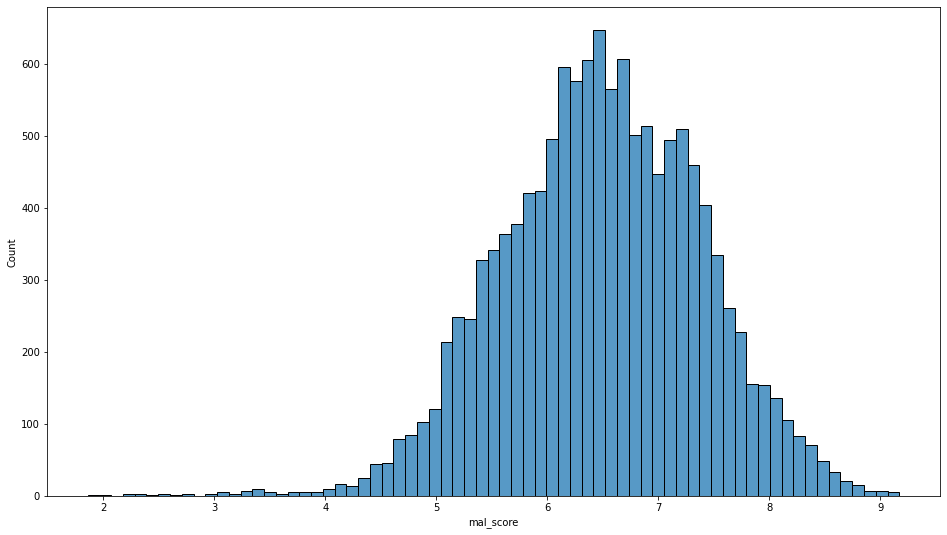

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,9))
sns.histplot(df, x='mal_score')

df.mal_score.describe()